In [48]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import neattext.functions as nfx
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [49]:
def classify_emotion(sentiment):
    if sentiment['compound'] >= 0.3:
        return 'joy'
    elif sentiment['compound'] <= -0.3:
        return 'sadness'
    elif sentiment['compound'] >= 0.1:
        return 'surprise'
    elif sentiment['compound'] >= 0.05:
        return 'excitement'
    elif sentiment['compound'] <= -0.05:
        return 'anger'
    else:
        return 'disappointment'

In [50]:
input_file = "C:/Users/kevin/Music/Sentiment and emotional analysis of payment reviews/sentiment analysis12.csv"
output_file = 'output_emotion_data.csv'

In [51]:
data = []
with open(input_file, 'r', encoding='latin-1') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row['Text'])

In [52]:
analyzer = SentimentIntensityAnalyzer()
results = []
for text in data:
    sentiment = analyzer.polarity_scores(text)
    emotion = classify_emotion(sentiment)
    results.append({'Text': text, 'Emotion': emotion})

In [53]:
fieldnames = ['Text', 'Emotion']
with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

In [54]:
df = pd.read_csv(output_file)
df

Text  Emotion
0      Rasy to use really... But there never, ever sh...  sadness
1      I still do not understand why your restricting...      joy
2      Keeps disappearing from home page. Very disapp...  sadness
3      No ticket/transport support for Europe. Also n...  sadness
4      App is now working for me as expected. Google ...      joy
...                                                  ...      ...
43981  App is good for paying Credit card bills. Rece...      joy
43982  I lost my money in cred app. I have paid my cr...      joy
43983  Scary - Uninstalled it after going through my ...      joy
43984  You want me rate your app here you go. You are...      joy
43985  The app experience is smooth but to be honest ...      joy

[43986 rows x 2 columns]

In [55]:
df['Emotion'].value_counts()

joy               27333
sadness            8318
disappointment     3763
anger              2297
surprise           1893
excitement          382
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

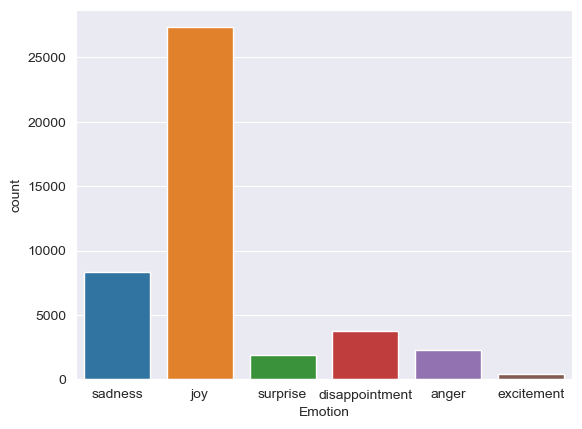

In [56]:
sns.countplot(x='Emotion',data=df)

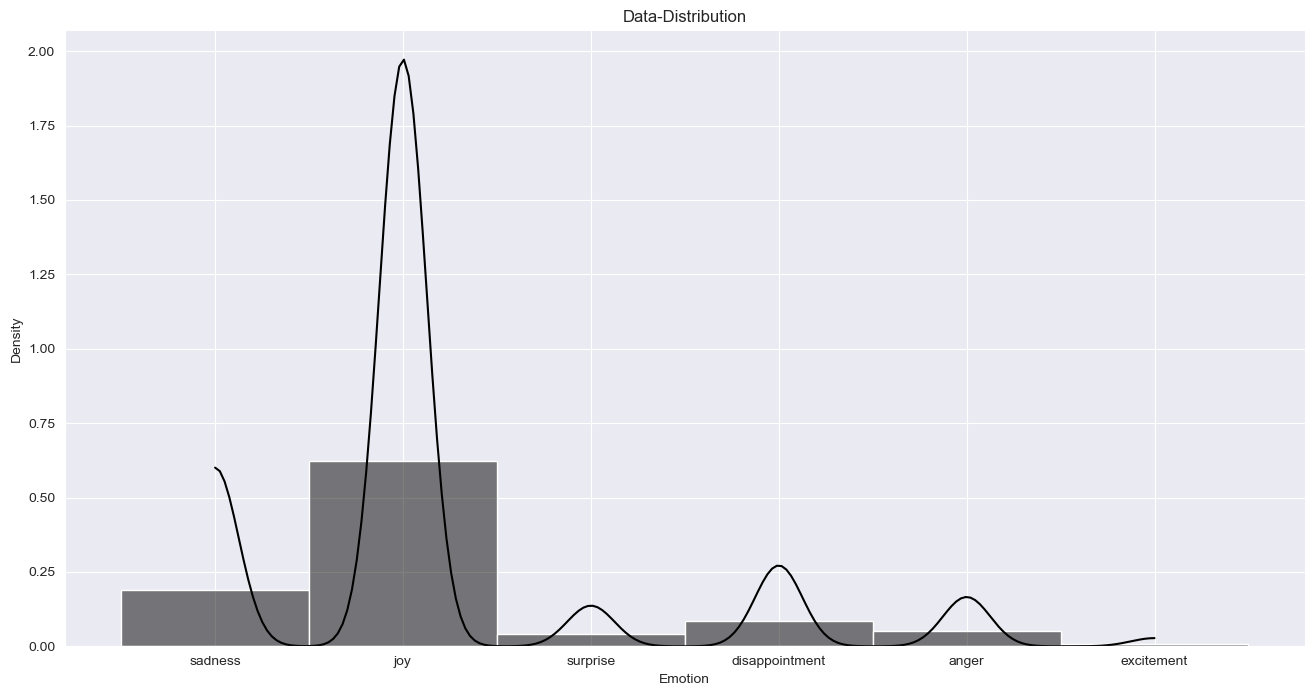

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('darkgrid')

plt.figure(figsize=(16,8))
plt.title('Data-Distribution')
sns.histplot(df['Emotion'], kde=True, color='black', stat='density')
plt.show()

In [58]:
from textblob import TextBlob

In [59]:
def get_sentiment(Text):
    blob = TextBlob(Text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [60]:
get_sentiment("I Love coding")

'Positive'

In [61]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [62]:
df

Text  Emotion Sentiment
0      Rasy to use really... But there never, ever sh...  sadness  Positive
1      I still do not understand why your restricting...      joy  Positive
2      Keeps disappearing from home page. Very disapp...  sadness  Negative
3      No ticket/transport support for Europe. Also n...  sadness   Neutral
4      App is now working for me as expected. Google ...      joy  Positive
...                                                  ...      ...       ...
43981  App is good for paying Credit card bills. Rece...      joy  Positive
43982  I lost my money in cred app. I have paid my cr...      joy   Neutral
43983  Scary - Uninstalled it after going through my ...      joy  Positive
43984  You want me rate your app here you go. You are...      joy  Positive
43985  The app experience is smooth but to be honest ...      joy  Positive

[43986 rows x 3 columns]

In [63]:
df.groupby(['Emotion','Sentiment']).size()

Emotion         Sentiment
anger           Negative       971
                Neutral        638
                Positive       688
disappointment  Negative       652
                Neutral       1894
                Positive      1217
excitement      Negative       145
                Neutral         84
                Positive       153
joy             Negative      1633
                Neutral       1411
                Positive     24289
sadness         Negative      5849
                Neutral        898
                Positive      1571
surprise        Negative       557
                Neutral        359
                Positive       977
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

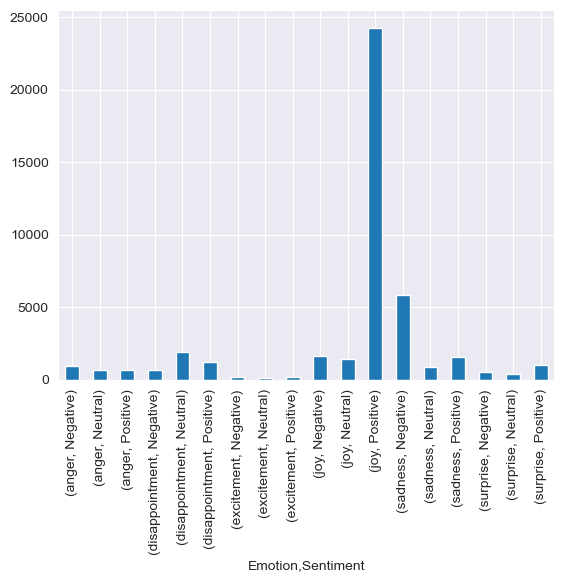

In [64]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [65]:
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

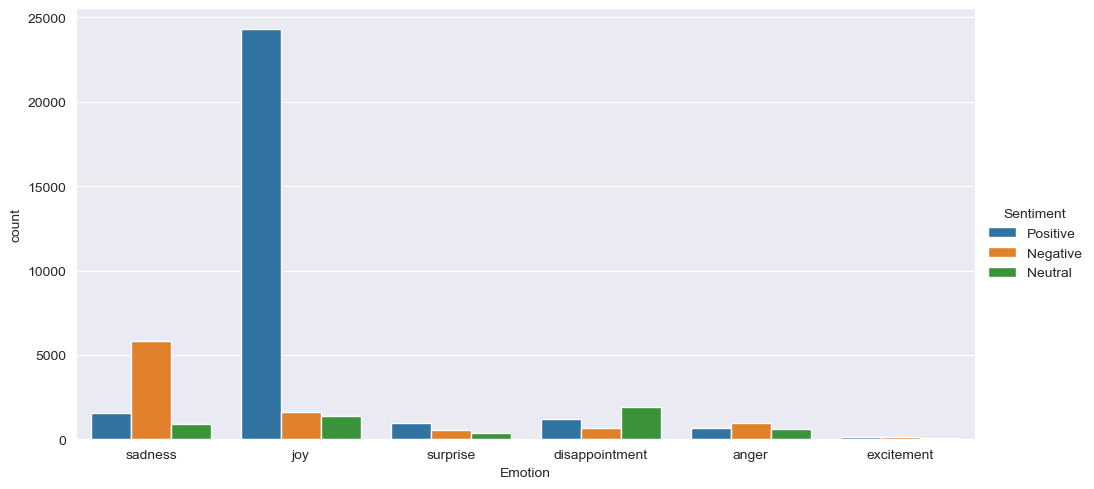

In [66]:
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', aspect=2)

In [67]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [68]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [69]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [70]:
df

Text  Emotion Sentiment  \
0      Rasy to use really... But there never, ever sh...  sadness  Positive   
1      I still do not understand why your restricting...      joy  Positive   
2      Keeps disappearing from home page. Very disapp...  sadness  Negative   
3      No ticket/transport support for Europe. Also n...  sadness   Neutral   
4      App is now working for me as expected. Google ...      joy  Positive   
...                                                  ...      ...       ...   
43981  App is good for paying Credit card bills. Rece...      joy  Positive   
43982  I lost my money in cred app. I have paid my cr...      joy   Neutral   
43983  Scary - Uninstalled it after going through my ...      joy  Positive   
43984  You want me rate your app here you go. You are...      joy  Positive   
43985  The app experience is smooth but to be honest ...      joy  Positive   

                                              Clean_Text  
0      Rasy use really... never, "bad-data" apps. for...  
1      understand restricting certain legal active ca...  
2      Keeps disappearing home page. disappointing co...  
3      ticket/transport support Europe. way scan Nfc-...  
4      App working expected. Google Pay smart watches...  
...                                                  ...  
43981  App good paying Credit card bills. Recently pu...  
43982  lost money cred app. paid credit card bill cre...  
43983  Scary - Uninstalled going research. Happy old ...  
43984  want rate app go. luring raffles spin wheel no...  
43985  app experience smooth honest useful rewards. d...  

[43986 rows x 4 columns]

In [71]:
from collections import Counter

In [72]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict( most_common_tokens)

In [73]:
emotion_list = df['Emotion'].unique().tolist()

In [74]:
emotion_list

['sadness', 'joy', 'surprise', 'disappointment', 'anger', 'excitement']

In [75]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [76]:
joy_docx = ' '.join(joy_list)

In [77]:
joy_docx

'understand restricting certain legal active cards?! use able add virtual cards bank simplistic Google Wallet. devil came knocking entered Android Pay preventing adding virtual cards. able add cards, ie physical virtual, like Google trying users apply card mean submit PII legit credit card. Let add virtual credit cards again. use app store loyalty programme cards. Love UI!Ñ??? App working expected. Google Pay smart watches (finally) available New Zealand, Ticwatch Pro works payments. phone use contactless payments, accessing loyalty cards etc. Recently able store Covid vaccine certificate, coming use new Zealand shortly. Good Love app easy 7se helps new good far amazing app I\'m getting Google Play Services crashed time try use app. Stock Nexus 5, rooted. Useful & good app good App Good A+ Great app Good Super convenient, fast secure. Works great thankyou Useful, needs quicker way access rewards cards. widget card handy instead wait app load, access card great, buy maybe sort charts pa

In [78]:
keyword_joy = extract_keywords(joy_docx)

In [79]:
keyword_joy

{'app': 11324,
 'credit': 10261,
 'card': 8771,
 'payment': 6070,
 'good': 4189,
 'pay': 3640,
 'bill': 2964,
 'easy': 2951,
 'cred': 2878,
 'use': 2579,
 'Good': 2251,
 'payments': 1999,
 'rewards': 1993,
 'app.': 1847,
 'bills': 1776,
 'cards': 1699,
 'like': 1416,
 'customer': 1376,
 'time': 1325,
 'nice': 1257,
 'Nice': 1248,
 'support': 1240,
 'Great': 1219,
 'best': 1200,
 'great': 1187,
 'CRED': 1175,
 'paying': 1158,
 'Cred': 1154,
 'Best': 1136,
 'fast': 1115,
 'App': 1088,
 'Easy': 1075,
 'experience': 1048,
 'application': 969,
 'user': 966,
 'service': 894,
 'Excellent': 864,
 '&': 860,
 'way': 843,
 'useful': 842,
 'Credit': 841,
 'cashback': 830,
 'money': 827,
 'bank': 826,
 'cash': 808,
 'got': 807,
 'option': 783,
 'payment.': 767,
 'reward': 756,
 'paid': 754}

In [80]:
def plot_most_common_words(mydict):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

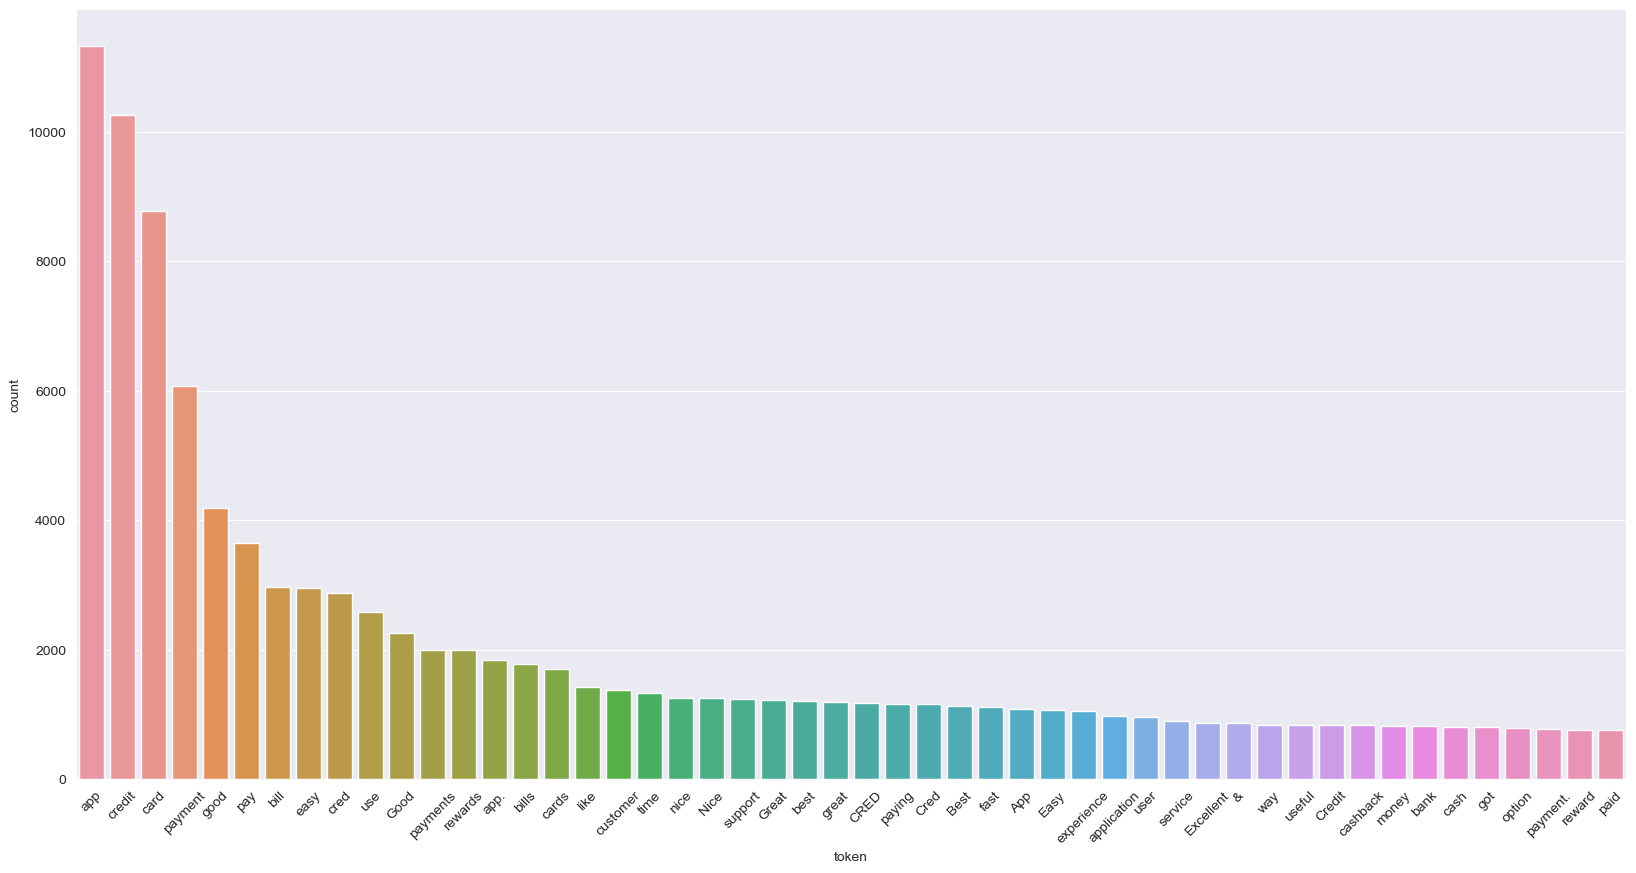

In [81]:
plot_most_common_words(keyword_joy)

In [82]:
from wordcloud import WordCloud

In [83]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

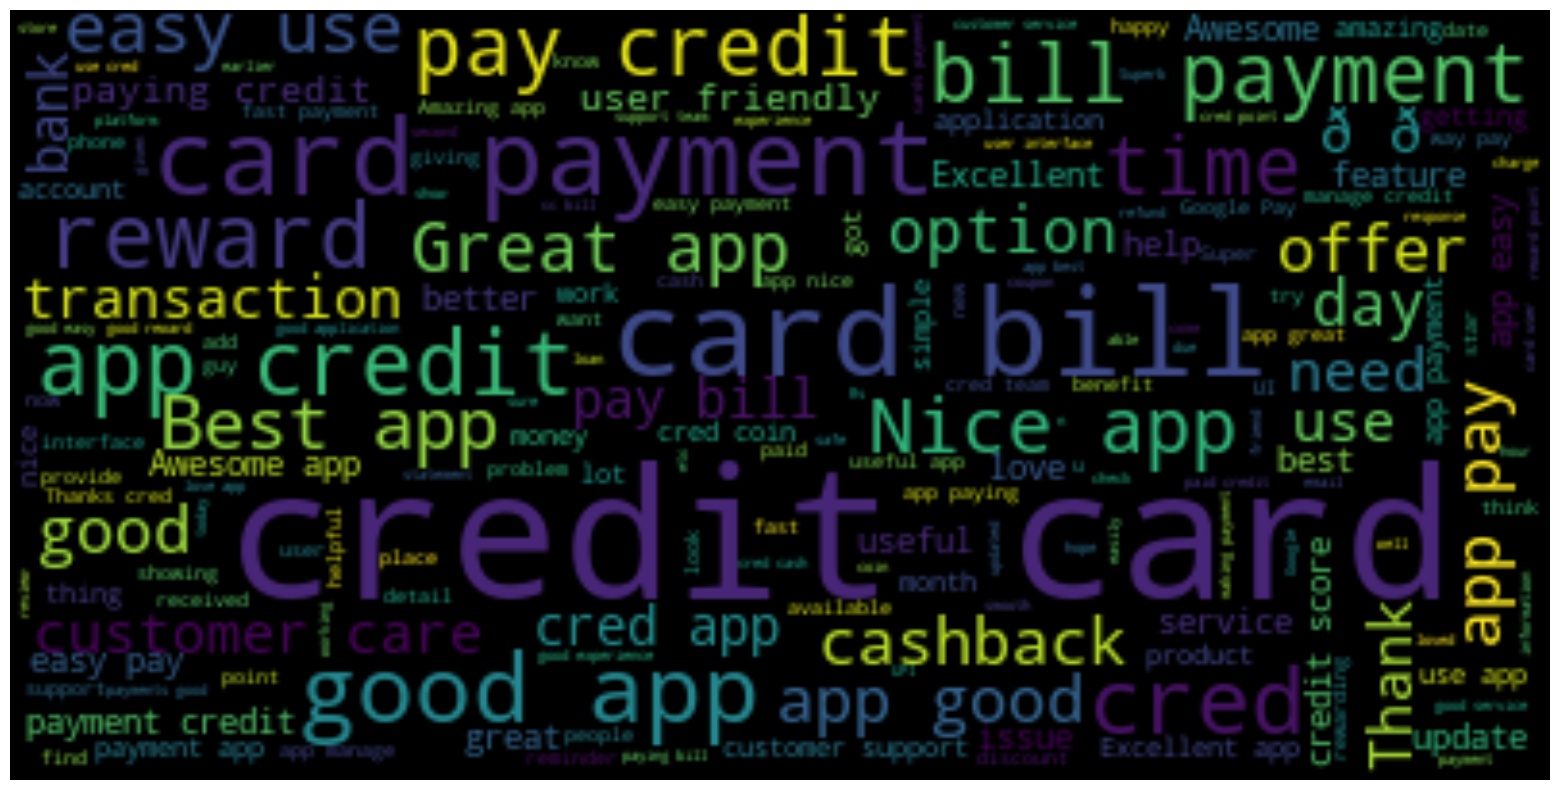

In [84]:
plot_wordcloud(joy_docx)

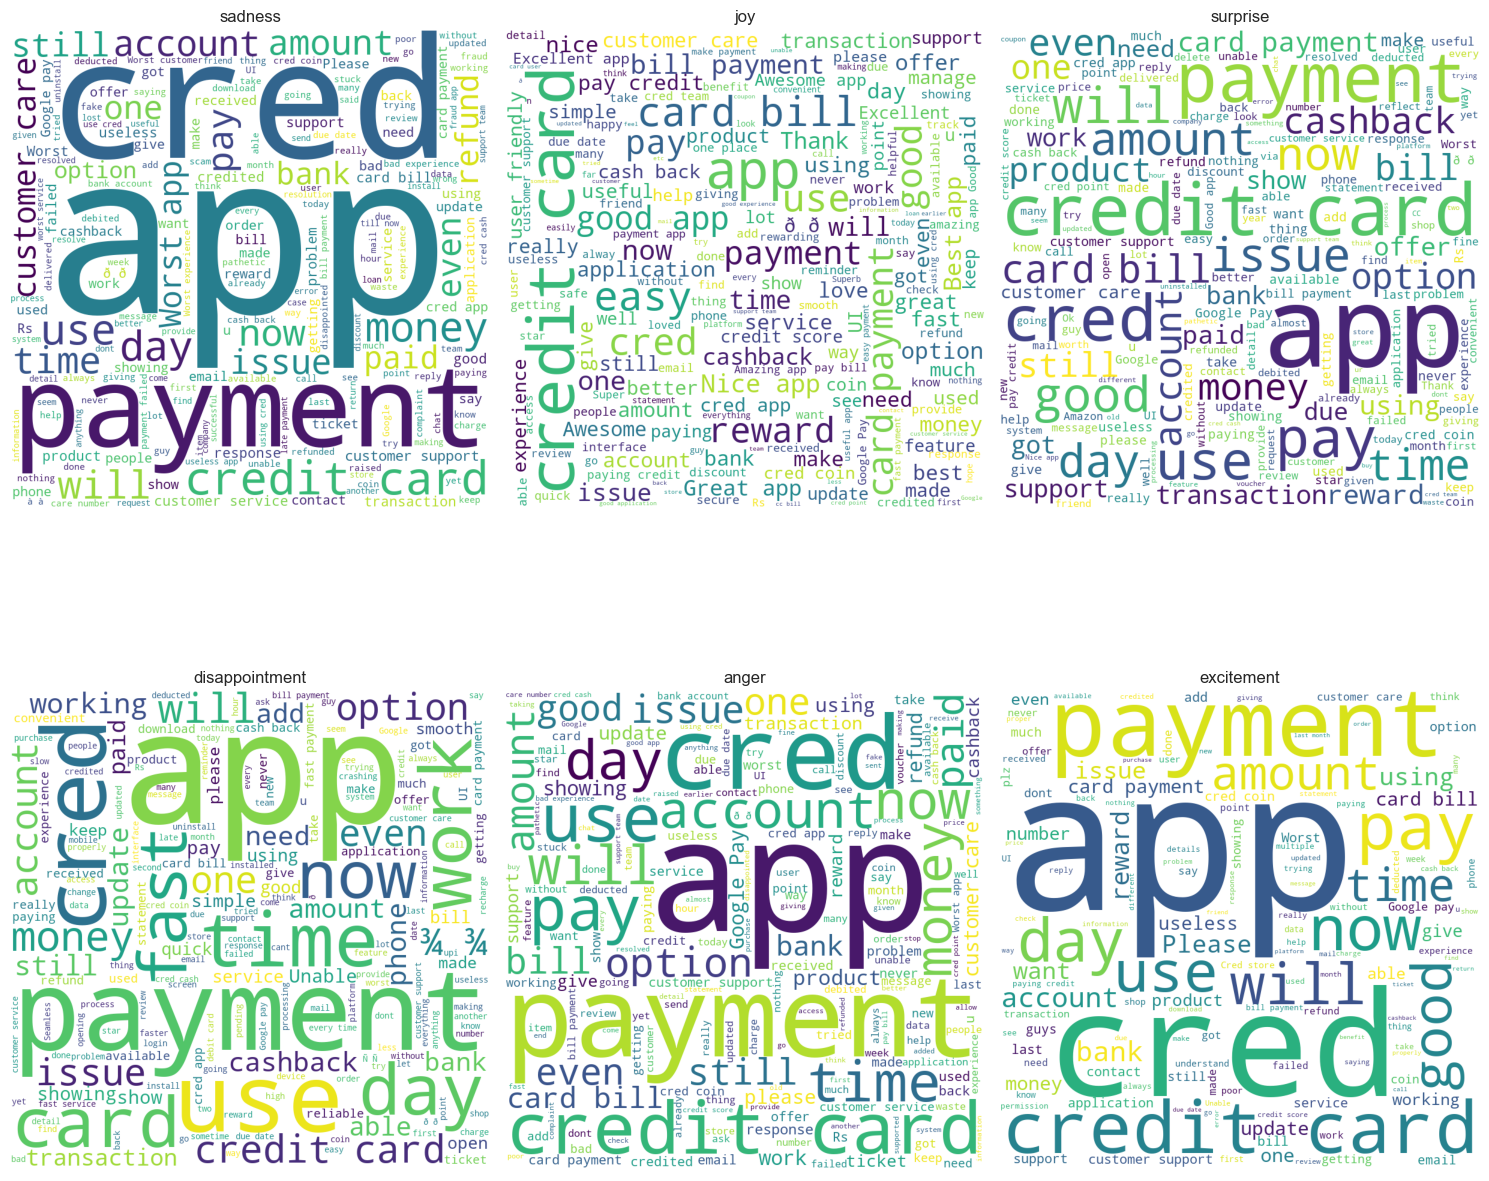

In [85]:
sentiments = df['Emotion'].unique()
sentiments = list(sentiments)
sentiments = list(sentiments) + list(sentiments[:3])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

for ax, sentiment in zip(axes.flatten(), sentiments):
    text = " ".join(df[df['Emotion'] == sentiment]['Text'])
    cloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    ax.imshow(cloud)
    ax.set_title(sentiment)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [86]:
df = df[df['Sentiment'] != 'Neutral']
df

Text  Emotion Sentiment  \
0      Rasy to use really... But there never, ever sh...  sadness  Positive   
1      I still do not understand why your restricting...      joy  Positive   
2      Keeps disappearing from home page. Very disapp...  sadness  Negative   
4      App is now working for me as expected. Google ...      joy  Positive   
5                                                   Good      joy  Positive   
...                                                  ...      ...       ...   
43980  I have been using app from past 6 months. I se...      joy  Negative   
43981  App is good for paying Credit card bills. Rece...      joy  Positive   
43983  Scary - Uninstalled it after going through my ...      joy  Positive   
43984  You want me rate your app here you go. You are...      joy  Positive   
43985  The app experience is smooth but to be honest ...      joy  Positive   

                                              Clean_Text  
0      Rasy use really... never, "bad-data" apps. for...  
1      understand restricting certain legal active ca...  
2      Keeps disappearing home page. disappointing co...  
4      App working expected. Google Pay smart watches...  
5                                                   Good  
...                                                  ...  
43980  app past 6 months. issue today. spin deducting...  
43981  App good paying Credit card bills. Recently pu...  
43983  Scary - Uninstalled going research. Happy old ...  
43984  want rate app go. luring raffles spin wheel no...  
43985  app experience smooth honest useful rewards. d...  

[38702 rows x 4 columns]

In [87]:
from sklearn.model_selection import train_test_split

# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['emotion'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30961,), (7741,), (30961,), (7741,))

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

X_train.shape, X_test.shape

((30961, 14088), (7741, 14088))

Accuracy calculation result for Test Data: 0.954657021056711


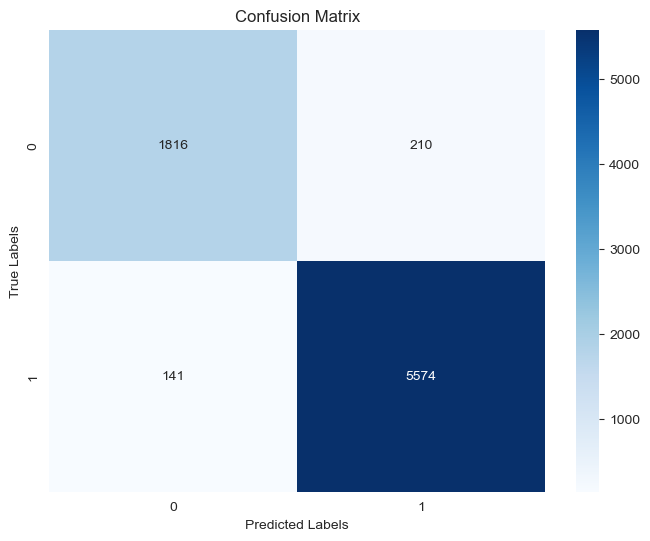

In [89]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lsvc = LinearSVC()

lsvc.fit(X_train, y_train)

y_pred_train = lsvc.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = lsvc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy calculation result for Test Data: {acc_test}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()               

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.93      0.90      0.91      2026
    Positive       0.96      0.98      0.97      5715

    accuracy                           0.95      7741
   macro avg       0.95      0.94      0.94      7741
weighted avg       0.95      0.95      0.95      7741



Accuracy calculation result for Test Data: 0.9370882314946389


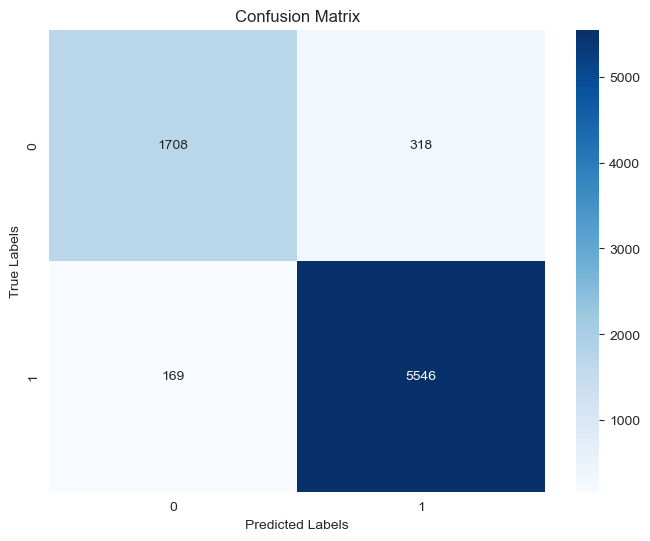

In [91]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = logreg.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy calculation result for Test Data: {acc_test}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.91      0.84      0.88      2026
    Positive       0.95      0.97      0.96      5715

    accuracy                           0.94      7741
   macro avg       0.93      0.91      0.92      7741
weighted avg       0.94      0.94      0.94      7741



Accuracy calculation result for Test Data: 0.9249450975326186


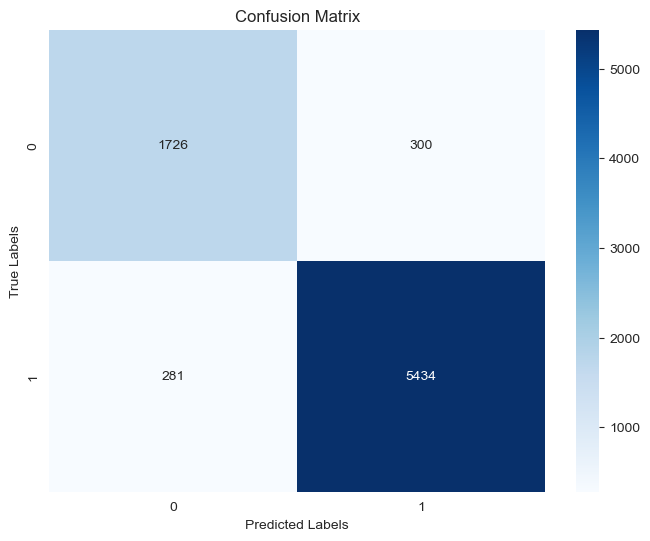

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = dtc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy calculation result for Test Data: {acc_test}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.86      2026
    Positive       0.95      0.95      0.95      5715

    accuracy                           0.92      7741
   macro avg       0.90      0.90      0.90      7741
weighted avg       0.92      0.92      0.92      7741

